## Setup

In [21]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zT30yV0MaJuH80D6gQrL")
project = rf.workspace("mytest-apoip").project("meter_reading-04wmm")
version = project.version(7)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to meter_reading-7 in yolov11:: 100%|██████████| 390/390 [00:00<00:00, 7138.99it/s]


In [41]:
import shutil

def train_and_save_model(dataset_path, save_path='best_model.pt', epochs=100,imgsz=640):
    """
    Train a YOLO model and save it

    Args:
    - dataset_path: Path to dataset.yaml
    - save_path: Path to save the trained model
    - epochs: Number of training epochs

    Returns:
    - Trained model object
    """
    # Initialize model with pre-trained weights
    model = YOLO('/content/yolov8n.pt')  # You can change to different sizes like yolov8s.pt, yolov8m.pt

    # Train the model
    results = model.train(
        data=os.path.join(dataset_path, 'data.yaml'),
        epochs=epochs,
        imgsz=imgsz
    )

    # Save the best model
    model.save(save_path)


In [42]:
def load_and_predict(model_path, image_path):
    """
    Load a saved model and make predictions

    Args:
    - model_path: Path to the saved model
    - image_path: Path to the image for prediction

    Returns:
    - Prediction results
    """
    # Load the saved model
    model = YOLO(model_path)

    # Run inference
    results = model(image_path)

    return results


image 1/1 /content/PLM-20241101-00000020.png: 480x640 3 0s, 1 5, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)


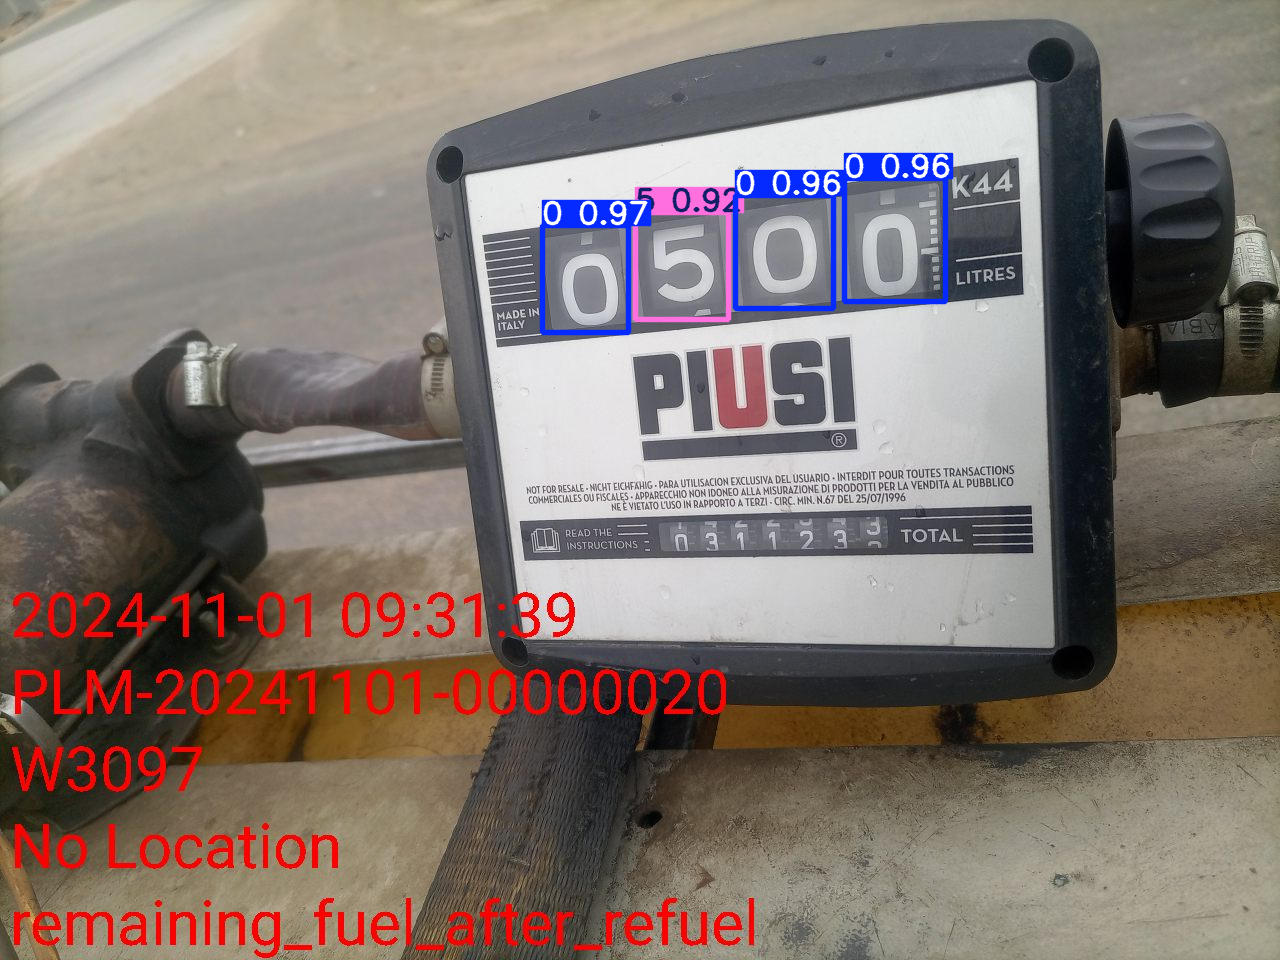


Detection Results:
Class: 0, Confidence: 0.97
Class: 0, Confidence: 0.96
Class: 0, Confidence: 0.96
Class: 5, Confidence: 0.92


In [45]:

# Download dataset
dataset_path = '/content/meter_reading-7'
test_image = '/content/PLM-20241101-00000020.png'
save_path =  '/content/fuel_meter_V8.pt'
# Train and save the model
#trained_model = train_and_save_model( dataset_path,  save_path=save_path)
# Save the model
model = YOLO('/content/runs/detect/train5/weights/best.pt')
model.save(save_path)
# Load the saved model and predict
predictions = load_and_predict(save_path, test_image)

visualize_predictions(predictions)

In [37]:
def visualize_predictions(results):
    """
    Visualize predictions in Google Colab

    Args:
    - results: YOLO prediction results
    """
    for result in results:
        # Plot the results
        plotted_image = result.plot()

        # Display in Colab
        from google.colab.patches import cv2_imshow
        cv2_imshow(plotted_image)

        # Save the image
        import cv2
        cv2.imwrite('predictions.jpg', plotted_image)

        # Print detection details
        print("\nDetection Results:")
        for box in result.boxes:
            # Get class name, confidence, and bounding box
            cls = result.names[int(box.cls[0])]
            conf = float(box.conf[0])
            print(f"Class: {cls}, Confidence: {conf:.2f}")